In [1]:
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
from helpers import *

# Data import and cleaning

In [2]:
(yb_t, input_data_t, ids_t) = load_csv_data('data/train.csv', sub_sample = True)
(yb_test, input_data_test, ids_test) = load_csv_data('data/test.csv',sub_sample = True)

In [3]:
input_clean = clean_data(input_data_t)
test_clean = clean_data(input_data_test)

In [4]:
n_features = len(input_data_t[0,:])
n_points = len(input_data_t)

print(n_features)
print(n_points)

30
5000


# Feature Processing
Eleminate data points where incomplete feature

In [5]:
input_without_point = input_clean[~np.isnan(input_clean).any(axis =1)]
yb_without_point = yb_t[~np.isnan(input_clean).any(axis =1)]
print(len(input_without_point))
print(len(yb_without_point))

1369
1369


In [6]:
def least_squares_SGD2(
        y, tx, initial_w, max_iters, gamma):
    """Stochastic gradient descent."""
    # Use the standard mini-batch-size 1
    batch_size = 1
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        for y_batch, tx_batch in batch_iter(y, tx, batch_size=batch_size, num_batches=1):
            # compute a stochastic gradient and loss
            grad, _ = compute_stoch_gradient(y_batch, tx_batch, w)
            # update w through the stochastic gradient update
            w = w - gamma * grad
            # calculate loss
            loss = compute_loss(y, tx, w)
            # store w and loss
            ws.append(w)
            losses.append(loss)
            
    return ws, losses


Result from SGD2, w3 =  [  1.11445646e-04  -5.03332936e-04  -2.83678610e-05   7.72663345e-04
   1.21161355e-05   6.72827464e-04  -2.87167585e-05  -1.53399689e-06
  -3.47920735e-04  -1.69808165e-04  -1.13975740e-05   1.83213228e-05
   6.01791207e-06   3.37288791e-04   1.73359738e-06  -2.23419695e-07
  -2.14951524e-05   2.94405302e-06   8.65905859e-06   2.19341315e-04
   9.52093757e-06  -7.76037774e-04  -9.69698607e-06   7.54819009e-05
  -5.42108098e-06  -7.59440039e-06  -1.27542769e-04   1.11662249e-06
  -7.78454261e-06  -4.85599946e-04]


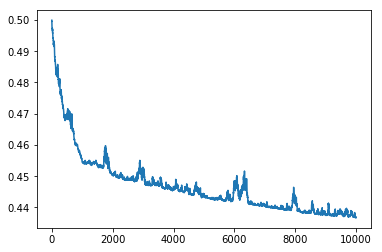

In [8]:
(w3, losses) = least_squares_SGD2(yb_without_point, input_without_point, np.zeros((n_features,)), 10000, 0.00000001)
print("Result from SGD2, w3 = ", w3[-1])
plt.plot(losses)
plt.show()

In [9]:
from Model import *
model_SGD = least_squares_SGD(max_iters = 10000, gamma = 0.00000001)
model_SGD.fit(yb_without_point, input_without_point)
print("Result from model.SGD, model_SGD.w_ = ", model_SGD.w_[-1])

KeyboardInterrupt: 

In [ ]:
def ridge_regression2(y, tx, lambda_):
    """implement ridge regression."""
    aI = lambda_ * np.identity(tx.shape[1])
    a = tx.T.dot(tx) + aI
    b = tx.T.dot(y)
    return np.linalg.solve(a, b)

w2 = ridge_regression2(yb_without_point, input_without_point, 1)
print("Result from ridge_regression2, w2 = ", w2)

In [ ]:
from Model import *
model_ridge = ridge_regression()
model_ridge.fit(yb_without_point, input_without_point)
print("Result from model.ridge_regression, model_ridge.w_ = ", model_ridge.w_)